In [1]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle
api_key = {"username":"manojrangera","key":"5a63b7a39544de4a43d4bd1487a480a6"}

# download dataset
import json
!mkdir /root/.kaggle
with open("/root/.kaggle/kaggle.json", "w") as file:
  json.dump(api_key,file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d aceofspades914/cgi-planes-in-satellite-imagery-w-bboxes

#Extract Dataset
!mkdir /content/data
!unzip -q cgi-planes-in-satellite-imagery-w-bboxes.zip -d /content/data

     |████████████████████████████████| 58 kB 2.6 MB/s 
100% 1.30G/1.30G [00:08<00:00, 164MB/s]
100% 1.30G/1.30G [00:08<00:00, 168MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
TRAIN_IMAGES_DIR = "/content/data/training/train"
TEST_IMAGES_DIR = "/content/data/training/test"

TRAIN_CSV_DIR = "/content/data/train_labels.csv"
TEST_CSV_DIR = "/content/data/test_labels.csv"

In [4]:
train_images = []
for image_name in os.listdir(TRAIN_IMAGES_DIR):
  if image_name.endswith(".png"):
    train_images.append(image_name)

test_images = []
for image_name in os.listdir(TEST_IMAGES_DIR):
  if image_name.endswith(".png"):
    test_images.append(image_name)    


In [5]:
train_images

['img373.png',
 'img165.png',
 'img287.png',
 'img196.png',
 'img92.png',
 'img30.png',
 'img237.png',
 'img233.png',
 'img195.png',
 'img173.png',
 'img243.png',
 'img367.png',
 'img17.png',
 'img157.png',
 'img164.png',
 'img318.png',
 'img348.png',
 'img60.png',
 'img105.png',
 'img332.png',
 'img313.png',
 'img158.png',
 'img386.png',
 'img244.png',
 'img217.png',
 'img366.png',
 'img187.png',
 'img311.png',
 'img106.png',
 'img171.png',
 'img200.png',
 'img294.png',
 'img123.png',
 'img142.png',
 'img139.png',
 'img275.png',
 'img306.png',
 'img310.png',
 'img51.png',
 'img15.png',
 'img11.png',
 'img163.png',
 'img286.png',
 'img10.png',
 'img365.png',
 'img12.png',
 'img205.png',
 'img118.png',
 'img102.png',
 'img322.png',
 'img255.png',
 'img132.png',
 'img143.png',
 'img136.png',
 'img240.png',
 'img219.png',
 'img39.png',
 'img375.png',
 'img247.png',
 'img5.png',
 'img70.png',
 'img283.png',
 'img160.png',
 'img324.png',
 'img197.png',
 'img352.png',
 'img116.png',
 'img48.

In [6]:
test_images

['img464.png',
 'img461.png',
 'img465.png',
 'img437.png',
 'img497.png',
 'img493.png',
 'img444.png',
 'img494.png',
 'img439.png',
 'img415.png',
 'img421.png',
 'img476.png',
 'img486.png',
 'img474.png',
 'img454.png',
 'img475.png',
 'img467.png',
 'img402.png',
 'img469.png',
 'img456.png',
 'img473.png',
 'img428.png',
 'img449.png',
 'img487.png',
 'img455.png',
 'img472.png',
 'img407.png',
 'img468.png',
 'img460.png',
 'img438.png',
 'img478.png',
 'img452.png',
 'img422.png',
 'img483.png',
 'img495.png',
 'img482.png',
 'img458.png',
 'img470.png',
 'img477.png',
 'img412.png',
 'img426.png',
 'img403.png',
 'img450.png',
 'img427.png',
 'img481.png',
 'img401.png',
 'img419.png',
 'img479.png',
 'img446.png',
 'img466.png',
 'img431.png',
 'img430.png',
 'img420.png',
 'img488.png',
 'img434.png',
 'img405.png',
 'img484.png',
 'img417.png',
 'img462.png',
 'img410.png',
 'img418.png',
 'img485.png',
 'img496.png',
 'img453.png',
 'img442.png',
 'img435.png',
 'img409.p

In [7]:
!mkdir /content/train_data
!mkdir /content/train_data/images
!mkdir /content/train_data/images/train
!mkdir /content/train_data/images/val
!mkdir /content/train_data/labels
!mkdir /content/train_data/labels/train
!mkdir /content/train_data/labels/val

In [8]:
TRAIN_IMAGES_OPDIR = "/content/train_data/images/train"
TEST_IMAGES_OPDIR = "/content/train_data/images/val"

TRAIN_LABELS_OPDIR = "/content/train_data/labels/train"
TEST_LABELS_OPDIR = "/content/train_data/labels/val"

In [9]:
import shutil

for image_name in train_images:
    from_location = os.path.join(TRAIN_IMAGES_DIR, image_name)
    to_location = os.path.join(TRAIN_IMAGES_OPDIR, image_name)
    shutil.copy(from_location, to_location)


for image_name in test_images:
    from_location = os.path.join(TEST_IMAGES_DIR, image_name)
    to_location = os.path.join(TEST_IMAGES_OPDIR, image_name)
    shutil.copy(from_location, to_location)

In [10]:
train_csv = pd.read_csv(TRAIN_CSV_DIR)
test_csv = pd.read_csv(TEST_CSV_DIR)
train_csv.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,img1.png,1000,700,plane,410,356,469,419
1,img1.png,1000,700,plane,635,276,738,380
2,img1.png,1000,700,plane,830,46,902,119
3,img1.png,1000,700,plane,669,80,715,120
4,img1.png,1000,700,plane,58,225,108,272


In [11]:
class_names = train_csv["class"].unique()

class_mapping = {}
for i, class_name in enumerate(class_names):
    class_mapping[i]=class_name


idx_mapping = {}
for idx, class_name in class_mapping.items():
     idx_mapping[class_name]=idx


print(class_mapping)
print(idx_mapping)

{0: 'plane'}
{'plane': 0}


In [12]:
def visualize_image(base_dir,image_name,bboxes,image_sizes):
    image_size = img_width, img_height

    image = cv2.imread(os.path.join(base_dir,image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    i = 0
    for box in bboxes:
        cid, x_center, y_center, box_width, box_height = box

        x_center   *= img_width
        y_center   *= img_height
        box_width  *= img_width
        box_height *= img_height
        
        xmin = int(x_center-(box_width/2))
        xmax = int(xmin + box_width)
        ymin = int(y_center-(box_height/2))
        ymax = int(ymin + box_height)
        cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0, 255,0), thickness = 2)

        ((label_width, label_height), _) = cv2.getTextSize(
            str(labels[i]),
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1.75,
            thickness = 2
            )

        cv2.rectangle(
            image,
            (int(xmin),int(ymin)),
            (
             int(xmin + label_width + label_width *0.05),
             int(ymin + label_height + label_height * 0.25)
            ),
            color = (0, 255, 0),
            thickness = cv2.FILLED
            )

        cv2.putText(
            image,
            str(labels[i]),
            org = (int(xmin), int(ymin + label_height + label_height * 0.25)),  #bottom left point of the text
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1.75,
            color = (255, 255, 255),
            thickness = 2
            )
        i = i + 1

    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')

img219.png
['plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane', 'plane']
[[0.         0.335      0.82428571 0.06       0.08285714]
 [0.         0.3645     0.13357143 0.071      0.10142857]
 [0.         0.713      0.61642857 0.088      0.13      ]
 [0.         0.7915     0.345      0.109      0.15571429]
 [0.         0.7935     0.23785714 0.099      0.14428571]
 [0.         0.79       0.73       0.054      0.07428571]
 [0.         0.51       0.29       0.09       0.13142857]
 [0.         0.139      0.88785714 0.086      0.12428571]
 [0.         0.2505     0.27071429 0.067      0.09857143]
 [0.         0.9215     0.33928571 0.067      0.10142857]
 [0.         0.3335     0.20285714 0.069      0.09142857]
 [0.         0.8415     0.41714286 0.063      0.09142857]
 [0.         0.2555     0.17928571 0.079      0.11285714]
 [0.         0.388      0.75928571 0.06       0.08714286]
 [0.         0.193      0.28357143 0.072 

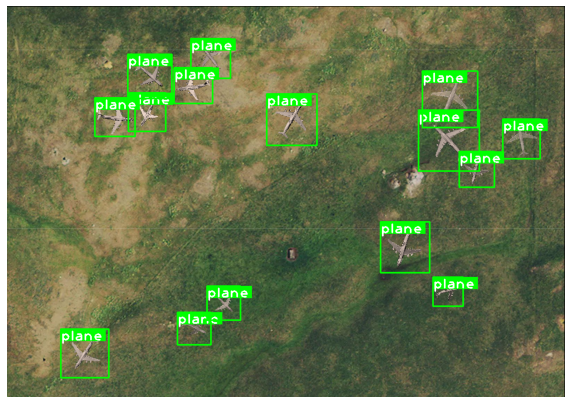

In [13]:
for image_no, image_name in enumerate(train_images):

    image_labels = train_csv[train_csv["filename"]==image_name]
    image_id = image_name.split('.')[0]

    labels = []
    bounding_boxes = []
    image_sizes= []
    for _, row in image_labels.iterrows():

        _, img_width, img_height, class_name, xmin, ymin, xmax, ymax = row.to_numpy()

        class_id   = idx_mapping[class_name]
        label = class_mapping[class_id]
        box_width  = xmax-xmin
        box_height = ymax-ymin
        x_center   = xmin + (box_width/2)
        y_center   = ymin + (box_height/2)

        x_center /= img_width
        box_width /= img_width
        y_center /= img_height
        box_height /= img_height

        single_label = np.array([class_id, x_center, y_center, box_width, box_height])

        single_label = np.expand_dims(single_label, axis=0)
        bounding_boxes.append(single_label)
        image_sizes.append((img_width,img_height))
        labels.append(label)

    bounding_boxes = np.concatenate(bounding_boxes, axis=0)

    i = 55
    if image_no==i:
        print(image_name)
        print(labels)
        print(bounding_boxes)
        visualize_image(TRAIN_IMAGES_OPDIR, image_name, bounding_boxes, image_sizes)

    SAVE_DIR = os.path.join(TRAIN_LABELS_OPDIR, f"{image_id}.txt")
    np.savetxt(SAVE_DIR, bounding_boxes, fmt=['%d', '%f', '%f', '%f', '%f'])

img449.png
['plane']
[[0.         0.758      0.095      0.046      0.06428571]]


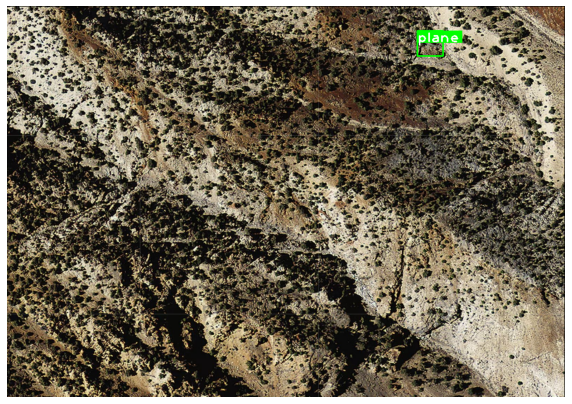

In [14]:
for image_no, image_name in enumerate(test_images):

    image_labels = test_csv[test_csv["filename"]==image_name]
    image_id = image_name.split('.')[0]

    labels = []
    bounding_boxes = []
    image_sizes= []
    for _, row in image_labels.iterrows():

        _, img_width, img_height, class_name, xmin, ymin, xmax, ymax = row.to_numpy()

        class_id   = idx_mapping[class_name]
        label = class_mapping[class_id]
        box_width  = xmax-xmin
        box_height = ymax-ymin
        x_center   = xmin + (box_width/2)
        y_center   = ymin + (box_height/2)

        x_center /= img_width
        box_width /= img_width
        y_center /= img_height
        box_height /= img_height

        single_label = np.array([class_id, x_center, y_center, box_width, box_height])

        single_label = np.expand_dims(single_label, axis=0)
        bounding_boxes.append(single_label)
        image_sizes.append((img_width,img_height))
        labels.append(label)

    bounding_boxes = np.concatenate(bounding_boxes, axis=0)

    i = 22
    if image_no==i:
        print(image_name)
        print(labels)
        print(bounding_boxes)
        visualize_image(TEST_IMAGES_OPDIR, image_name, bounding_boxes, image_sizes)

    SAVE_DIR = os.path.join(TEST_LABELS_OPDIR, f"{image_id}.txt")
    np.savetxt(SAVE_DIR, bounding_boxes, fmt=['%d', '%f', '%f', '%f', '%f'])

In [15]:
!sudo apt-get install tree -qq > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [16]:
!tree /content/train_data -L 2

/content/train_data
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories, 0 files


In [17]:
!cat /content/train_data/labels/train/img1.txt

0 0.439500 0.553571 0.059000 0.090000
0 0.686500 0.468571 0.103000 0.148571
0 0.866000 0.117857 0.072000 0.104286
0 0.692000 0.142857 0.046000 0.057143
0 0.083000 0.355000 0.050000 0.067143
0 0.552500 0.436429 0.053000 0.075714
0 0.846000 0.670714 0.048000 0.067143
0 0.627500 0.515714 0.073000 0.111429
0 0.879000 0.382857 0.082000 0.117143
0 0.633000 0.548571 0.056000 0.088571
0 0.801000 0.655714 0.052000 0.071429
0 0.197000 0.720000 0.076000 0.105714


In [18]:
%cd /content

/content


In [19]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 8704, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 8704 (delta 269), reused 262 (delta 147), pack-reused 8286
Receiving objects: 100% (8704/8704), 9.64 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (6009/6009), done.


In [20]:
%cd /content/yolov5

/content/yolov5


In [21]:
!pip install -r requirements.txt

     |████████████████████████████████| 636 kB 4.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [22]:
%%writefile config.yaml
train: /content/train_data/images/train
val: /content/train_data/images/val
nc: 1
names: ['plane']

Writing config.yaml


In [23]:
!python train.py --img 416 --batch 16 --epochs 30 --data /content/yolov5/config.yaml --cfg /content/yolov5/models/yolov5x.yaml --weights yolov5x.pt --name yolov5x_plane --cache

train: weights=yolov5x.pt, cfg=/content/yolov5/models/yolov5x.yaml, data=/content/yolov5/config.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=yolov5x_plane, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-346-g771ac6c torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v

In [24]:
!python detect.py --source /content/train_data/images/val --weights /content/yolov5/runs/train/yolov5x_plane/weights/best.pt --img 416 --conf 0.4

detect: weights=['/content/yolov5/runs/train/yolov5x_plane/weights/best.pt'], source=/content/train_data/images/val, imgsz=416, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-346-g771ac6c torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPs
image 1/100 /content/train_data/images/val/img401.png: 320x416 7 planes, Done. (0.112s)
image 2/100 /content/train_data/images/val/img402.png: 320x416 4 planes, Done. (0.110s)
image 3/100 /content/train_data/images/val/img403.png: 320x416 9 planes, Done. (0.100s)
image 4/100 /content/train_data/images/val/img404.png: 320x416 2 planes, Done. (0.102s)
image 5/100 /content/t

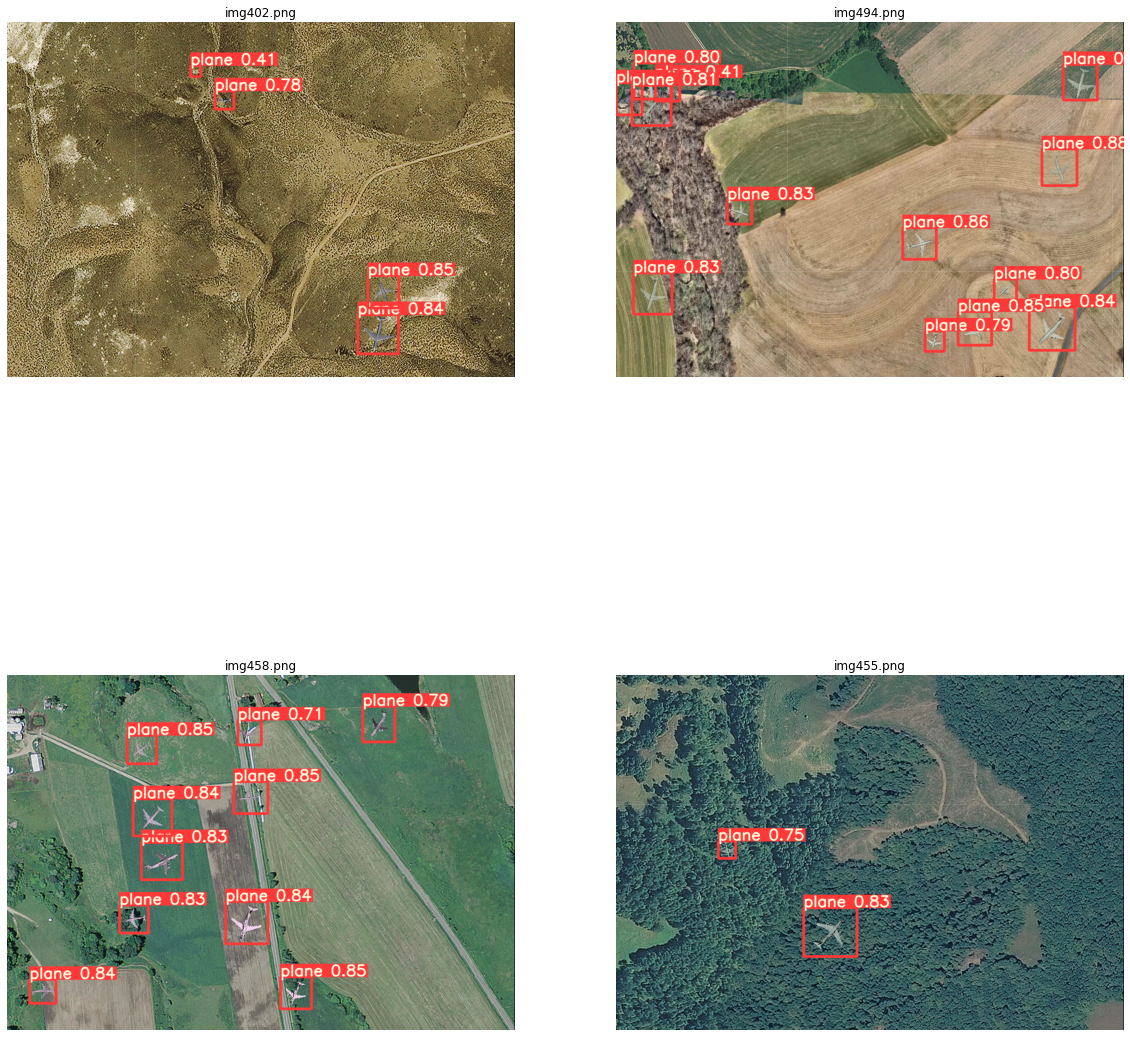

In [25]:
img_row = 2
img_col = 2
images_to_visualize = img_row*img_col

import random

# randomly select images_to_visualize images from pile
OUTPUT_IMAGE_DIR = "/content/yolov5/runs/detect/exp"
images = os.listdir(OUTPUT_IMAGE_DIR)
images = [random.choice(images) for _ in range(images_to_visualize)]
img_iter = iter(images)

fig, ax = plt.subplots(img_row,img_col, figsize=(20,20))
plt.subplots_adjust(hspace=0.5)

for i in range(img_row):
    for j in range(img_col):
        image_name = next(img_iter)
        image = cv2.imread(os.path.join(OUTPUT_IMAGE_DIR, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax[i][j].imshow(image)
        ax[i][j].title.set_text(image_name)
        ax[i][j].axis('off')